In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("iris.csv")
df.head

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["variety"]=le.fit_transform(df["variety"])

In [ ]:
X=df.iloc[:,:-1]
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=df.iloc[:,-1:]
y.head()

,variety
0,0
1,0
2,0
3,0
4,0


<function matplotlib.pyplot.show(close=None, block=None)>

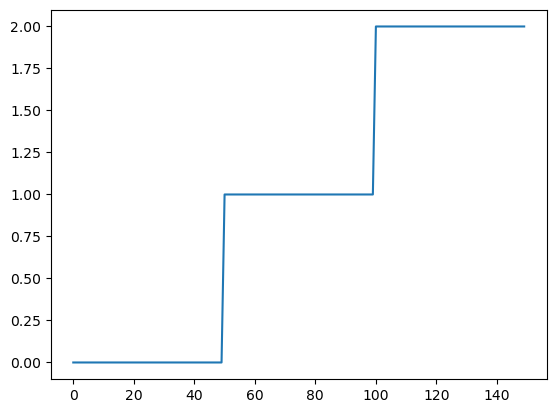

In [ ]:
plt.plot(y)
plt.show

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_gini = DecisionTreeClassifier(criterion="gini")
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)

print("AccuracY (Gini):", accuracy_score(y_test, y_pred))



AccuracY (Gini): 1.0


In [ ]:
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 1.0


In [ ]:
dt_random = DecisionTreeClassifier(
    criterion="gini",
    splitter="random"
)
dt_random.fit(X_train, y_train)

y_pred_random = dt_random.predict(X_test)
print("Accuracy (Random Splitter):", accuracy_score(y_test, y_pred_random))


Accuracy (Random Splitter): 1.0


# Decision Tree Algorithm (From Scratch)

## Algorithm Steps:
1. **Start at the Root**: The entire dataset is considered as the root node.
2. **Feature Selection**: For each feature, calculate a metric (like Gini Impurity or Information Gain) to determine how well it splits the data.
   - **Gini Impurity**: Measures the likelihood of an incorrect classification of a new instance of a random variable.
   - $Gini = 1 - \sum (p_i)^2$
   - **Entropy**: Measures the impurity or randomness.
   - $Entropy = - \sum p_i \log_2(p_i)$
3. **Find Best Split**: Select the feature and threshold that results in the highest Information Gain or lowest Gini Impurity.
4. **Create Child Nodes**: Split the dataset into subsets based on the best feature and threshold.
5. **Recursion**: Repeat the process for each child node recursively.
6. **Stopping Criteria**: Stop when:
   - A node is pure (all samples belong to one class).
   - Maximum depth is reached.
   - Minimum samples per split is not met.


In [ ]:
def entropy(y):
    class_labels = np.unique(y)
    entropy = 0
    for cls in class_labels:
        p_cls = len(y[y == cls]) / len(y)
        entropy += -p_cls * np.log2(p_cls)
    return entropy

def gini_index(y):
    class_labels = np.unique(y)
    gini = 0
    for cls in class_labels:
        p_cls = len(y[y == cls]) / len(y)
        gini += p_cls**2
    return 1 - gini

def calculate_information_gain(parent, l_child, r_child, mode="gini"):
    weight_l = len(l_child) / len(parent)
    weight_r = len(r_child) / len(parent)
    if mode == "gini":
        gain = gini_index(parent) - (weight_l*gini_index(l_child) + weight_r*gini_index(r_child))
    else:
        gain = entropy(parent) - (weight_l*entropy(l_child) + weight_r*entropy(r_child))
    return gain

def split(dataset, feature_index, threshold):
    dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
    return dataset_left, dataset_right

def get_best_split(dataset, num_samples, num_features):
    best_split = {}
    max_info_gain = -float("inf")
    for feature_index in range(num_features):
        feature_values = dataset[:, feature_index]
        possible_thresholds = np.unique(feature_values)
        for threshold in possible_thresholds:
            dataset_left, dataset_right = split(dataset, feature_index, threshold)
            if len(dataset_left) > 0 and len(dataset_right) > 0:
                y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                curr_info_gain = calculate_information_gain(y, left_y, right_y, "gini")
                if curr_info_gain > max_info_gain:
                    best_split["feature_index"] = feature_index
                    best_split["threshold"] = threshold
                    best_split["dataset_left"] = dataset_left
                    best_split["dataset_right"] = dataset_right
                    best_split["info_gain"] = curr_info_gain
                    max_info_gain = curr_info_gain
    return best_split

def calculate_leaf_value(Y):
    Y = list(Y)
    return max(Y, key=Y.count)

def build_tree(dataset, min_samples_split=2, max_depth=2, curr_depth=0):
    X, Y = dataset[:,:-1], dataset[:,-1]
    num_samples, num_features = np.shape(X)
    if num_samples >= min_samples_split and curr_depth <= max_depth:
        best_split = get_best_split(dataset, num_samples, num_features)
        if best_split.get("info_gain", 0) > 0:
            left_subtree = build_tree(best_split["dataset_left"], min_samples_split, max_depth, curr_depth+1)
            right_subtree = build_tree(best_split["dataset_right"], min_samples_split, max_depth, curr_depth+1)
            return {"feature_index": best_split["feature_index"], "threshold": best_split["threshold"], "left": left_subtree, "right": right_subtree, "info_gain": best_split["info_gain"]}
    leaf_value = calculate_leaf_value(Y)
    return {"value": leaf_value}

def print_tree(tree, indent=" "):
    if "value" in tree:
        print(tree["value"])
    else:
        print("X_"+str(tree["feature_index"]), "<=", tree["threshold"], "?", tree["info_gain"])
        print("%sleft:" % (indent), end="")
        print_tree(tree["left"], indent + indent)
        print("%sright:" % (indent), end="")
        print_tree(tree["right"], indent + indent)

def make_prediction(x, tree):
    if "value" in tree: return tree["value"]
    feature_val = x[tree["feature_index"]]
    if feature_val <= tree["threshold"]:
        return make_prediction(x, tree["left"])
    else:
        return make_prediction(x, tree["right"])

def predict(X, tree):
    preditions = [make_prediction(x, tree) for x in X]
    return preditions

def fit(X, Y, min_samples_split=2, max_depth=2):
    dataset = np.concatenate((X, Y.reshape(-1, 1)), axis=1)
    root = build_tree(dataset, min_samples_split, max_depth)
    return root


In [ ]:
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

if hasattr(y_train_np, 'flatten'):
    y_train_np = y_train_np.flatten()
    y_test_np = y_test_np.flatten()

tree = fit(X_train_np, y_train_np, min_samples_split=3, max_depth=3)
print("Decision Tree Structure:")
print_tree(tree)

y_pred_scratch = predict(X_test_np, tree)
acc = accuracy_score(y_test_np, y_pred_scratch)
print("Accuracy (Scratch Implementation):", acc)
